In [2]:
import pandas as pd
import numpy as np

In [3]:
# Now we do EDA and data cleaning on our data set. 
df = pd.read_csv('C://users//ajlal//downloads//bengaluru_house_prices.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.groupby('area_type')['area_type'].agg('count')
# We can see that we have different types of areas and different number of flats available per area_type. 

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
# Now lets drop some supposedly un-necessary columns. 
df1 = df.drop(['area_type','availability','society','balcony'], axis='columns')
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [7]:
# Now lets check if our data have any NaN values.
df1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
# Columns named size and bath have 16 and 73 NaN values respectively. 
# I think we should fill these NaN values with the mean values but we can also
# drop them because as compared 13000 rows 73 and 16 rows would not make much impact.
df1.dropna(inplace=True)
df1.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
# If you observe the size columns you will see some wierd values, e.g., 
# 3BHK. 2BHK etc. 
df1['size'].unique()
# I think 4 Bedroom is same as BHK. I will create a new column named BHK to
# better idetify them. 

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
# I noticed a very unexpected value in the unique values (119880) which was
# causing error again and again so I removed that value first.
df1['size'] = df1['size'].replace({119880.0: '2 BHK'})
# Now I am using a lambda function to read the size column and then 
# split the object into two and I am just storing the first object, e.g., 
# when x=2BHK and x-6BHK then it will only store 2 and 6 respectively.
df1['bhk'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))
df1

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [11]:
df1.bhk.unique()
# I think there are some outliers if i am not wrog because a home cannot have
# 43 bedrooms.

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
df1[df1.bhk>20]
# They are outliers for sure because in 13000 rows only two houses have so
# many rooms. Moreover, if we look at the total_sqft column in for both
# homes then we notice that it is not possible either to make so many
# rooms in such a small area. I think we need to explore the total_sqft columns. 

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [13]:
df1.total_sqft.unique()
# There is another important thing here we can see a value in range (1133-1384)
# We also need to address thing in this column. 

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
# We can make a function that can detect if a vlaue in our concered columns
# is float or not and can convert it if its not float. 
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df1[~df1.total_sqft.apply(is_float)].head(10)
# So we see that we have a lot of rows which have values in range and I also 
# noticed something very wierd value as 34.46Sq. Meter. 

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [16]:
# Now we will handle this issue by taking average of these range values
# and dropping the columsn which have weird values like 34.46Sq. Meter. 
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [17]:
# lets check if the function will work fine or not.
convert_sqft_to_num('1000')

1000.0

In [18]:
convert_sqft_to_num('1000-3000')

2000.0

In [19]:
convert_sqft_to_num('34.46Sq. Meter')
# so our function's main functionality was to ignore the wierd values so
# its working fine. 

In [20]:
df2 = df1.copy()
df2.total_sqft = df2.total_sqft.apply(convert_sqft_to_num)
df2.head()
# We can see that now our data frame is much better as compared to where we 
# started. 

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [21]:
df1[~df1.total_sqft.apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [22]:
# We can compare our results will the above values to see if our df2 is in the
# condition that we want it to be.
# at index 30 we can see the range.
df2.loc[30]
# so yes it has worked fine. 

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [23]:
df2.loc[410]
# Our function has worked really fine and replaced the weird values with NaN.
# Now we can easily either drop them or fill them with mean values. 

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
price            18.5
bhk                 1
Name: 410, dtype: object

In [24]:
df2.isna().sum()
# we can eaily fill them with the means. 

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [25]:
df3 = df2.dropna()
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [26]:
# Now as we are almost done with the data cleaning so we will use feature
# engineering techniques to further clean and explore our data. Using the feature
# engineering technique we create a new feature of price_per_sqft because in 
# real estate business it is a very critical feature of the buiness model. 
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*1000/df4['total_sqft']
df4
# I have multiplied it with 1000 euros so that I can get the price_per_sqft in
# thousand euros. 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36.998106
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46.153846
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43.055556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62.458909
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42.500000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,66.898349
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,52.585451
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,104.073363


In [27]:
# Now we will handle the location column. As we can see have a lot of locations.
df4.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [28]:
len(df4.location.unique()) # to be exact 1300 locations. 
# In simple words its a dimensionality problem or curse of dimensionality.

1298

In [29]:
# One thing we can do is that we can drop some locations which have very less
# homes. 

location_stats = df4.groupby('location')['location'].agg('count')
location_stats

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1298, dtype: int64

In [30]:
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield             532
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         264
Thanisandra            232
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1298, dtype: int64

In [31]:
# I think we can define the locations which have data points less then 10 as
# other locations.
len(location_stats[location_stats<=10])
# we have 1060 locations out of total which have less then 10 datapoints.

1058

In [32]:
location_stats_less_then_10 = location_stats[location_stats<=10]
location_stats_less_then_10

location
Dairy Circle            10
Sadashiva Nagar         10
Nagappa Reddy Layout    10
Kalkere                 10
Naganathapura           10
                        ..
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1058, dtype: int64

In [33]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_then_10 else x)
len(df4.location.unique())
# Now we have successfully defined the locations with less then 10 datapoints as
# other location or other category. Now we just have to deal with 241 locations
# while making the dummy variables. 

241

In [34]:
df4.head(10)
# We can see that the location at the index 9 is converted into other.

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36.998106
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46.153846
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43.055556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62.458909
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42.500000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,32.478632
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,74.670571
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,48.282443
9,other,6 Bedroom,1020.0,6.0,370.00,6,362.745098


In [35]:
# Now we will remove the outliers from our data, a data scientist can remove
# outliers either by using statistical techniques such as z-score, standard
# deviation or domain knowledge. For example this data we are working on is a
# real estate data so a real estate person can easily tell if 2 bedrooms are
# possible to build on some certain sqft area or not. 
# For example, we have a home with 600 sqft area and it have 6 rooms then each 
# room is built on 100 sqft which is not possible so we need to check these
# outliers. After consulting with our business manager who is a real estate expert
# we got to know that when we divide rooms with the area of house then the value 
# should be more then 300 so we are going to use this threshold. 

In [36]:
df4[df4.total_sqft/df4.bhk<300]
# I think we have found 744 outliers by using our domain knowledge technique.
# We will drop these rows. 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,362.745098
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,106.609808
68,other,8 Bedroom,1350.0,7.0,85.0,8,62.962963
70,other,3 Bedroom,500.0,3.0,100.0,3,200.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,155.714286
13279,other,6 Bedroom,1200.0,5.0,130.0,6,108.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,90.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,90.439276


In [37]:
df4.shape

(13200, 7)

In [38]:
# We have used this '~' sign it means to negate the condition that is provided
# after this sign. 
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12456, 7)

In [39]:
# Now we will detect and remove outliers from the column price_per_sqft.
df5.price_per_sqft.describe()
# remember our price_per_sqft is in thousand euros and here we can clearly 
# some outliers e.g., the max = 1764 thousand euros while the minimum is only
# 2.6 thousand euros. 

count    12456.000000
mean        63.085028
std         41.681273
min          2.678298
25%         42.105263
50%         52.941176
75%         69.166667
max       1764.705882
Name: price_per_sqft, dtype: float64

In [40]:
# Now we are going to write a function that can remove these extreme values
# from our price_per_sqft column.The most important is to understand how we 
# should remove the outliers because we have multiple locations and it is 
# possible that each location have different price levels so we will remove 
# the outliers per location. 
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

# The function defined above is taking df as an input and then grouping the 
# dataframe by location first. Then per location we get a new data frame as
# subdf then it calcultates the mean(m) and standard devaition(st) and after 
# that the fucntion filters any datapoints in subdf which are above mean-st
# means mean - one std and the datapoints above mean + one std(m+st) and keep
# remaining datapoints in the reduced_df.

        

In [41]:
df6 = remove_pps_outliers(df5)
df6.shape
# We have removed around 2 thousand outliers. 

(10245, 7)

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
# Now we will see if any location in our dataset have such a case where
# a 2 bedroom homes have either equal or more prices then 3 or more bedroom
# homes in the same area. To do that we will use scatter plots and define
# a function. 

import matplotlib.pyplot as plt
%matplotlib inline
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.figure(figsize=(15, 10)) 
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='Green',label='3 BHK',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    
# This function creates two different dataframes where for the same location 
# we will have the datapoints for 2 bedrooms and 3 bedrooms and then it will 
# plot a scatter plot. 

    

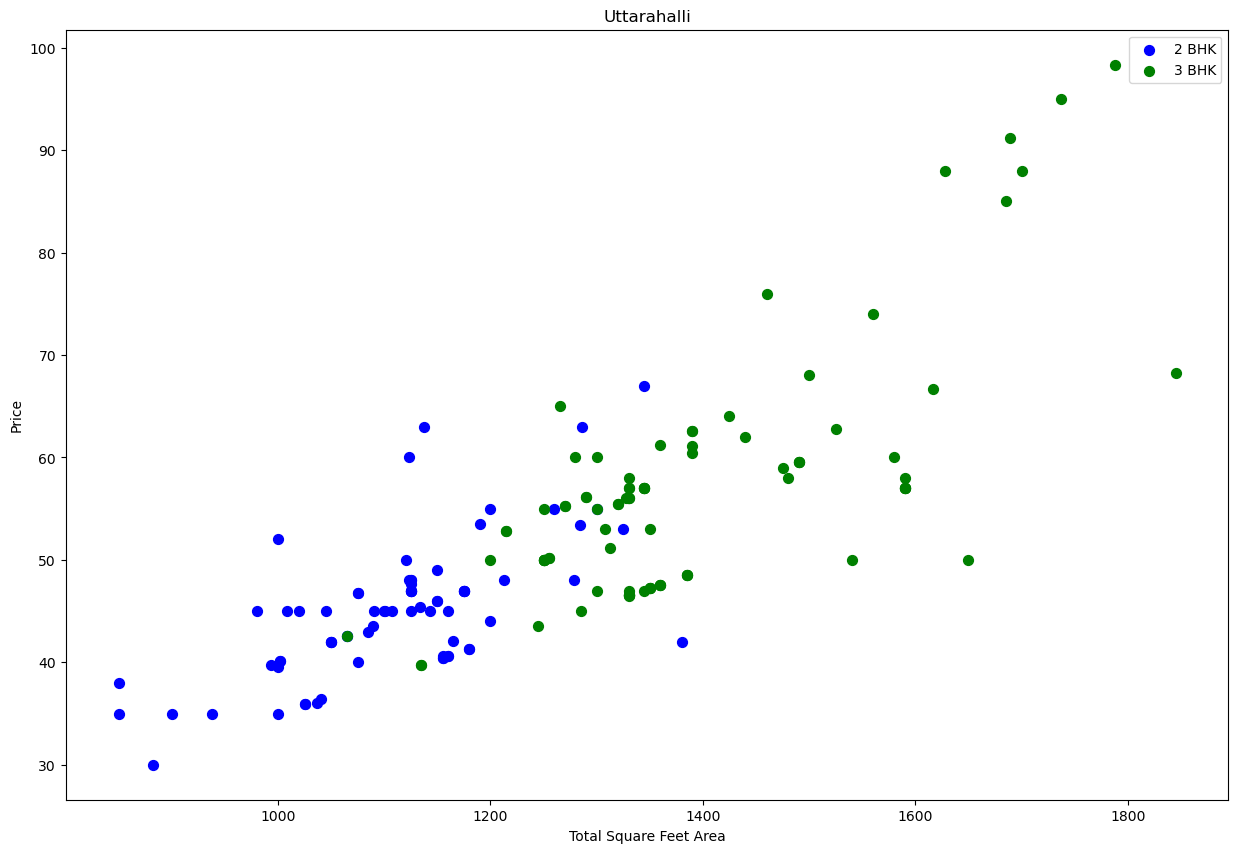

In [44]:
plot_scatter_chart(df6, 'Uttarahalli')
# There are alot of 3 Bedroom homes which are have prices equal or lower then
# the 2 bedroom homes. 

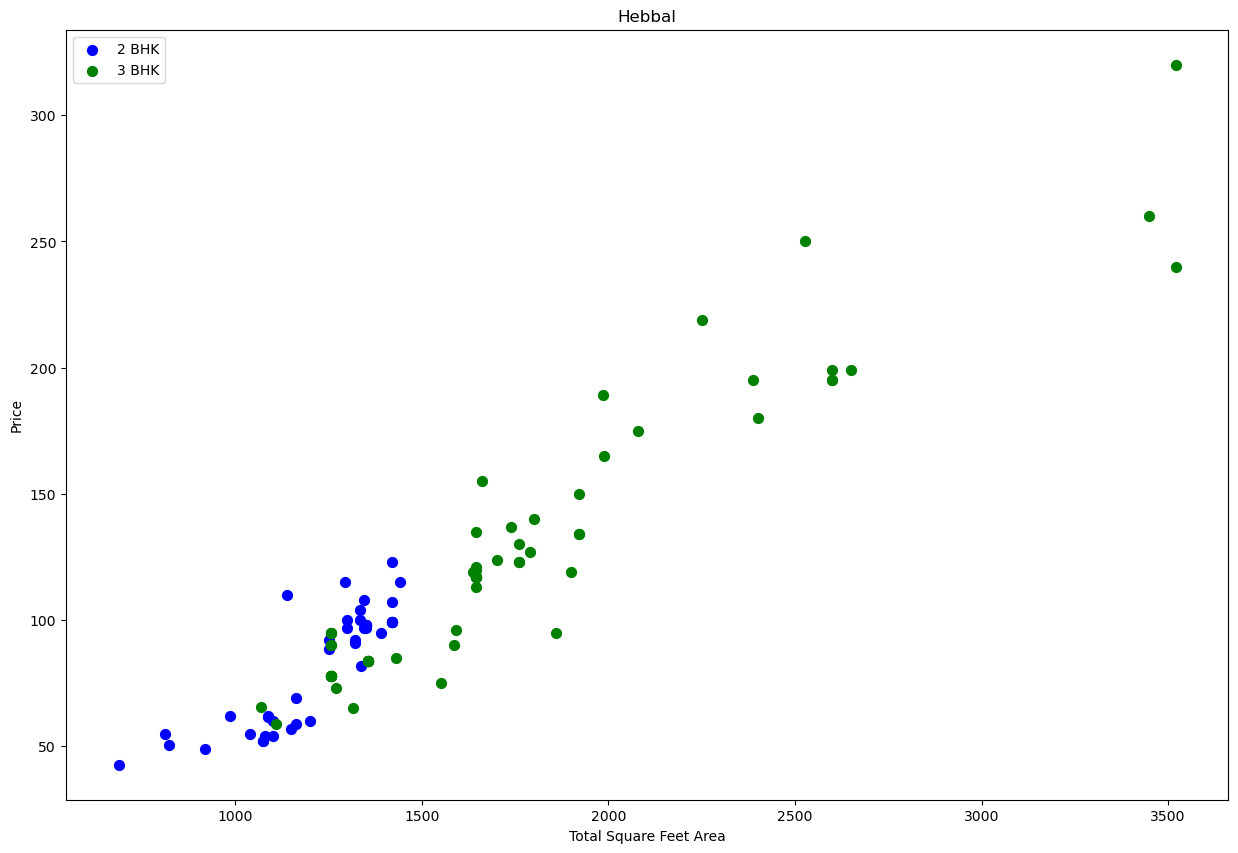

In [45]:
plot_scatter_chart(df6, 'Hebbal')

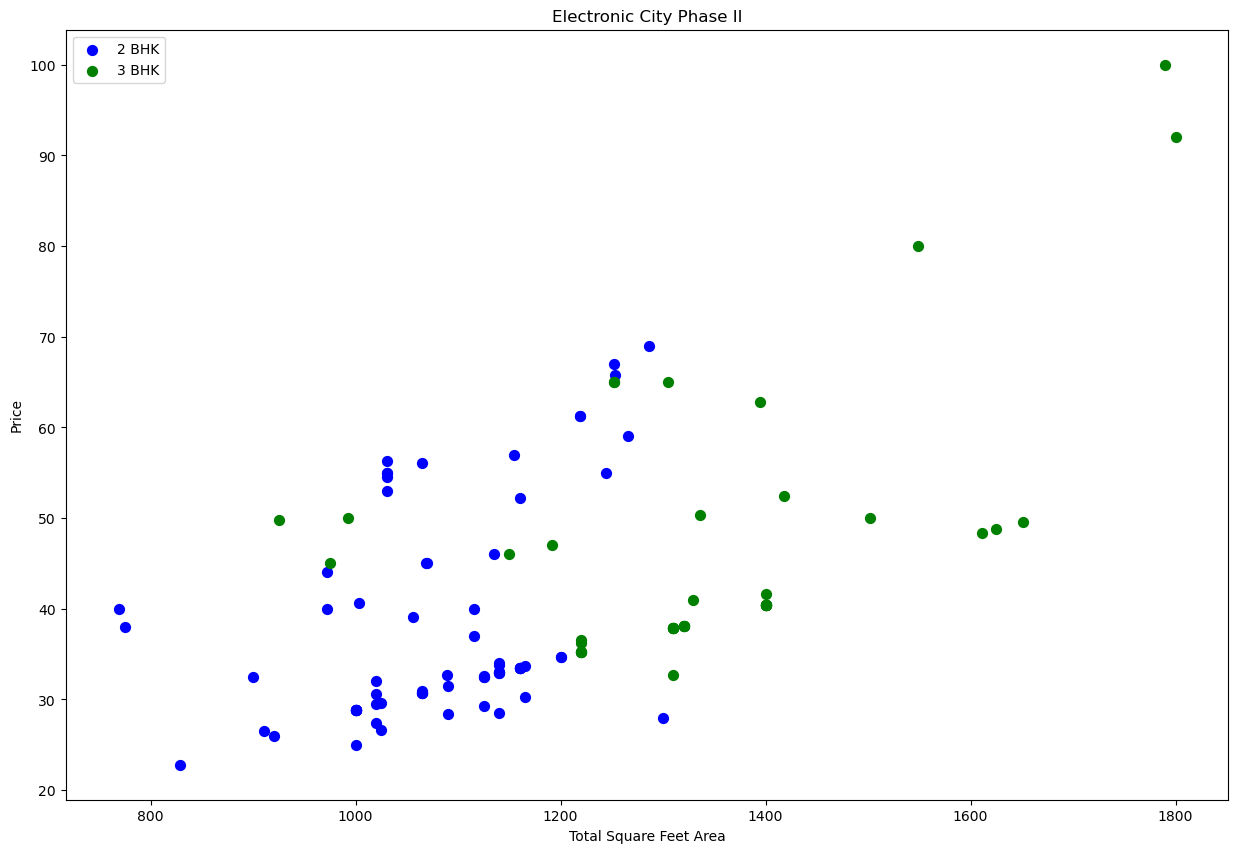

In [46]:
plot_scatter_chart(df6, 'Electronic City Phase II')

In [47]:
# We should also remove properties where for same location, the price 
# of (for example) 3 bedroom apartment is less than 2 bedroom apartment 
# (with same square ft area). What we will do is for a given location, 
# we will build a dictionary of stats per bhk Now we can remove those 2 BHK
# apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK 
 # apartment.

In [48]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

# The function is doing a groupby based on locations and then it is creating 
# new dataframes per location and then using the new data frames it is creating
# new dataframes per bhk. On the per bhk dataframe it will calculate mean std 
# count. Now is running another for loop to filter all those values whose 
# price_per_sqft is less then the mean of the previous per bhk data frame. 
# For example if mean of 1 BHK apartments at a particular location is 3000
# euros and if in the data frame of bhk of 2 bedrooms have any value of 
# price_per_sqft less then 3000 then it will drop those 2 BHK dataframe values. 

In [49]:
df7 = remove_bhk_outliers(df6)
df7.shape

(7331, 7)

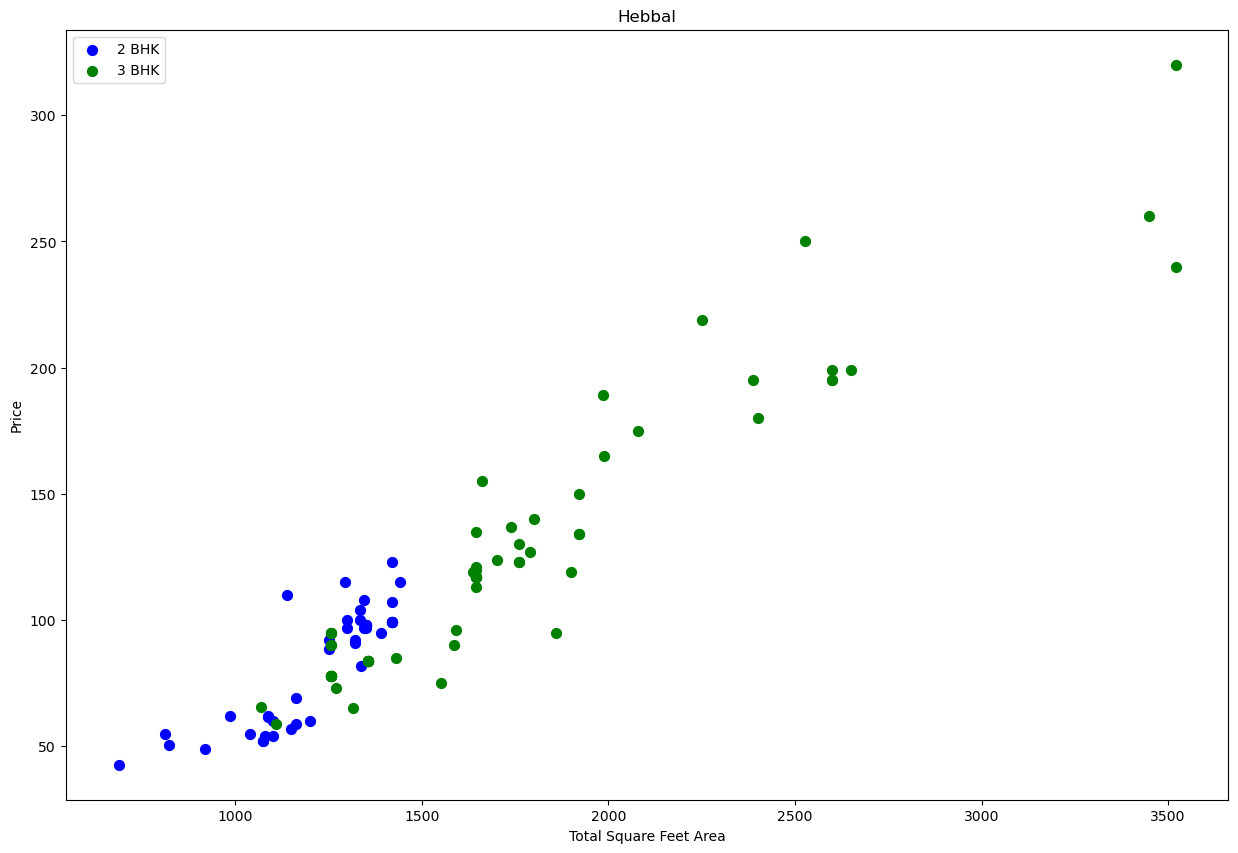

In [50]:
plot_scatter_chart(df6, 'Hebbal')

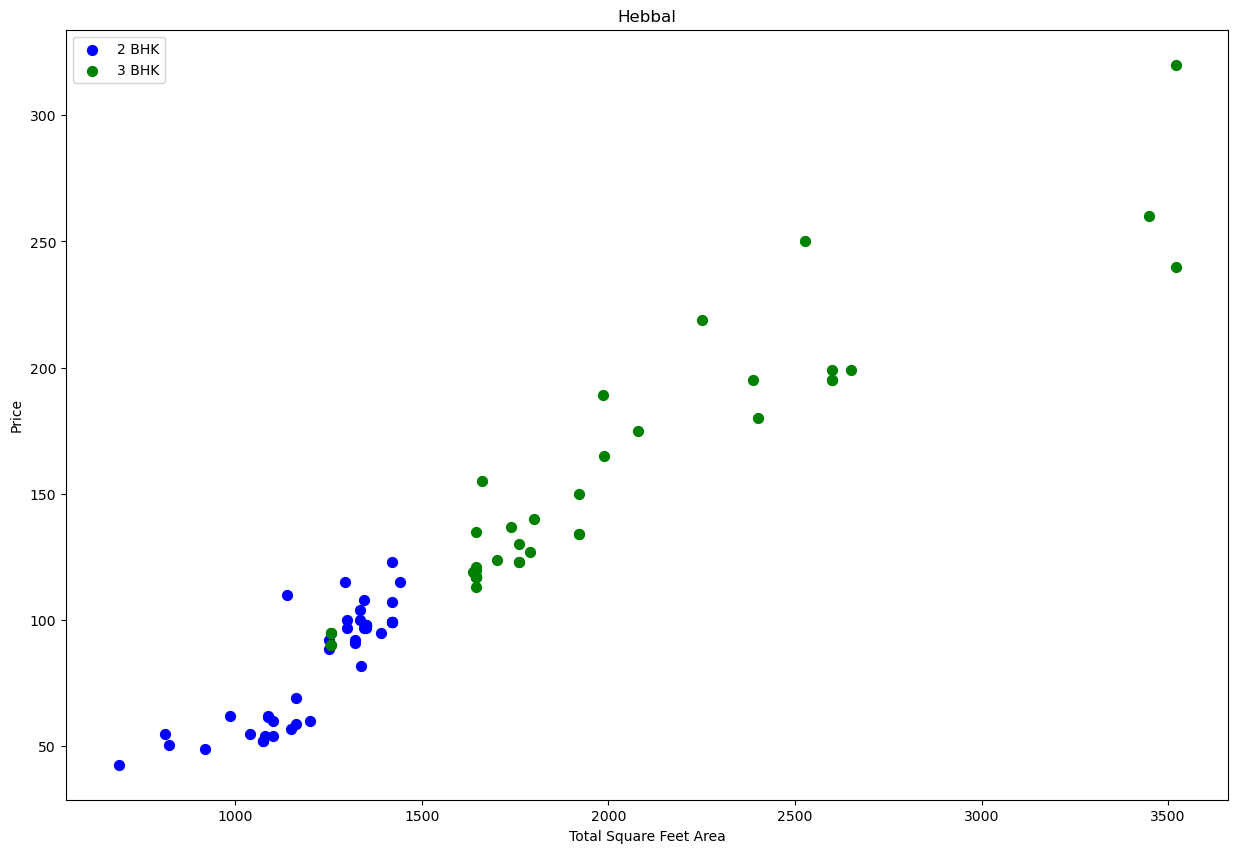

In [51]:
plot_scatter_chart(df7, 'Hebbal')
# We can compare this scatter plot to the above one and can easily observe that
# now majority of the 3 bedroom apartments have higher prices. 

Text(0, 0.5, 'Count')

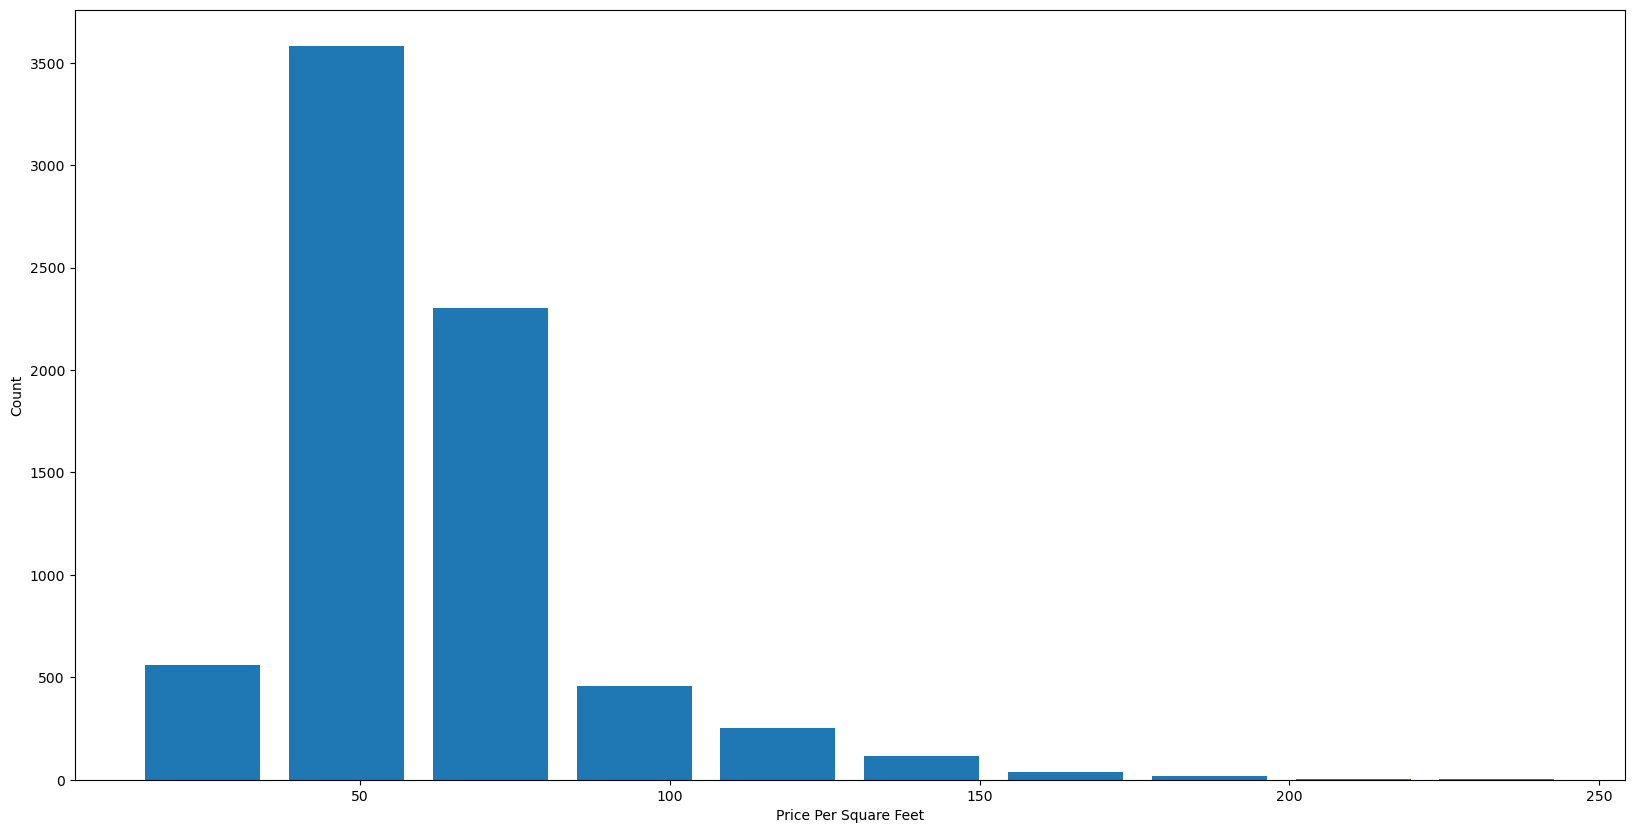

In [52]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
# We can see that our data after much of the cleaning is still normally 
# distributed. 

In [53]:
# Now we will explore the bathroom column. 
df7.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [54]:
# I do not think there can be house or apartment with 16 bathrooms. lets
# check how man of these outliers are present if we make 10 bathrooms our
# max threshold. 
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5271,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,40.000000
8478,other,10 BHK,12000.0,12.0,525.0,10,43.750000
8567,other,16 BHK,10000.0,16.0,550.0,16,55.000000
9307,other,11 BHK,6000.0,12.0,150.0,11,25.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,50.691244


In [55]:
# Again as a data scientist there are many ways to handle these outliers but
# we will use domain knowledge and lets suppose our business manager has defines
# a creiteria where he said if you have number of bathrooms greater then 
# 2+number of bedrooms then you should drop them . 

In [56]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,32.520325
5232,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,64.285714
6702,Thanisandra,3 BHK,1806.0,6.0,116.0,3,64.230343
8402,other,6 BHK,11338.0,9.0,1000.0,6,88.198977


In [57]:
df8 = df7[df7.bath<df7.bhk+2]
df8

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,32.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,69.166667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,34.188034
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,45.614035
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,45.406547
...,...,...,...,...,...,...,...
10236,other,2 BHK,1200.0,2.0,70.0,2,58.333333
10237,other,1 BHK,1800.0,1.0,200.0,1,111.111111
10240,other,2 BHK,1353.0,2.0,110.0,2,81.300813
10241,other,1 Bedroom,812.0,1.0,26.0,1,32.019704


In [58]:
# I think now our data is ready for machine learning model training which
# means we should now define our independent and dependent variables. Before
# doing that we need to drop some un-necessary columns for example, size as 
# we already have bhk column which is kind of dummy for size column. Moreover, 
# we created price_per_sqft just for the sake of outlier detetction as a
# feature engineering technique which means it also can be dropped. 

In [77]:
df9 = df8.drop(['size', 'price_per_sqft'], axis='columns')
df9
# Our data looks so yummy for our machine learning model training. 

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2
...,...,...,...,...,...
10236,other,1200.0,2.0,70.0,2
10237,other,1800.0,1.0,200.0,1
10240,other,1353.0,2.0,110.0,2
10241,other,812.0,1.0,26.0,1


In [81]:
dummies = pd.get_dummies(df9['location'])
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [82]:
df10 = pd.concat([df9, dummies], axis='columns')
df10

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10240,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10241,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [83]:
# to avoid the dummy variable trap we need to drop any one random column. 
# We can either manually drop it or define drop_first=True in the get_dummies
# function's argument.
df11 = df10.drop('other', axis='columns')
df11

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10240,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10241,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# Now we also need the drop the main column from whcih we have made dummies
# i.e., location column because now we dont need it as we got dummies. 
df12 = df11.drop('location' , axis='columns')
df12

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10240,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10241,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
# Now we have completed our data processing pepeline so we need to define
# the independent and dependent variables. 
X = df12.drop('price', axis='columns')
X

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10240,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10241,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
y = df12.price
y

1         40.0
2         83.0
3         40.0
4         65.0
5         43.0
         ...  
10236     70.0
10237    200.0
10240    110.0
10241     26.0
10244    400.0
Name: price, Length: 7253, dtype: float64

In [88]:
# As usual we are going to first use train_test_split method on our dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

In [92]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [93]:
reg_model.score(X_test, y_test)

0.778086605108818

In [96]:
# As a data scientist we want to come up with a model with best model and score.
# We have couple of techniques to do that and KFold Cross Va;idation is an 
# important one. 
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, train_size=0.8, random_state=0)

from sklearn.model_selection import cross_val_score
KFold_score = cross_val_score(LinearRegression(), X, y, cv=cv)
KFold_score 

array([0.84014922, 0.78873287, 0.86373278, 0.86871995, 0.88094502])

In [97]:
KFold_score.mean()
# We can see that K-Fold Cross Validation technique have significantly 
# increased the performance of our regression model. 

0.8484559666805183

In [121]:
# Now lets try some other regression models and use hyperparameter tuning
# with the help of skleanr GridSearchCV to come up with best model and score. 

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

model_params = {
    'linear_regression':{
        'model':LinearRegression(),
        'parameters':{
            'fit_intercept':[True, False]
        }
    },
    'lasso_regression':{
        'model':Lasso(),
        'parameters':{
            'alpha':[1,2],
            'selection':['random','cyclic']
        }
    },
    'decision_tree_regression':{
        'model':DecisionTreeRegressor(),
        'parameters':{
            'criterion':['squared_error', 'friedman_mse'],
            'splitter':['best','random']
        }
        }
}

scores = []
cv = ShuffleSplit(n_splits=5, train_size=0.8, random_state=0)
for model_name, mp in model_params.items():
    try:
        classifier = GridSearchCV(mp['model'],mp['parameters'], cv=cv, return_train_score=False)
        classifier.fit(X_train,y_train)
        scores.append({
        'Model':model_name,
        'Best_Score' :classifier.best_score_,
        'Best_Parameters':classifier.best_params_
    })
    
    except Exception as e:
        print(f"Error for model {model_name}: {str(e)}")

In [122]:
 scores

[{'Model': 'linear_regression',
  'Best_Score': 0.8513102830474673,
  'Best_Parameters': {'fit_intercept': False}},
 {'Model': 'lasso_regression',
  'Best_Score': 0.7063214070464596,
  'Best_Parameters': {'alpha': 1, 'selection': 'random'}},
 {'Model': 'decision_tree_regression',
  'Best_Score': 0.7633254049768526,
  'Best_Parameters': {'criterion': 'squared_error', 'splitter': 'best'}}]

In [123]:
df_scores = pd.DataFrame(scores, columns=['Model', 'Best_Score', 'Best_Parameters'])
df_scores

,Model,Best_Score,Best_Parameters
0,linear_regression,0.851310,{'fit_intercept': False}
1,lasso_regression,0.706321,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree_regression,0.763325,"{'criterion': 'squared_error', 'splitter': 'be..."


In [124]:
# I think we already have got a very good score with our KFold Cross Validation
# technique as it can be cofirmed with GridSearchCV. Now we will use the Linear
# regression to predict the property prices but with fit_intercept=False.

In [139]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0]
    
    if len(loc_index) > 0:
        loc_index = loc_index[0]
        x=np.zeros(len(X.columns))
        x[0] = sqft
        x[1] = bath
        x[2] = bhk
        if loc_index >= 0:
            x[loc_index] = 1
        
        return reg_model.predict([x])[0]
    else:
        return "Location not found in data"

# This function takes 4 inputs and in the x array we have first column is sqft
# the second column is bath and third column is bhk. the loc_index basically 
# tell the exact index of that specific location in X. And when we know the index
# of our concerned loction or function sets it equal to 1 and then it predicts
# the price. 

In [140]:
predict_price('Electronic City Phase II', 1000, 2, 2)

C:\Users\ajlal\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.948899058053655

In [142]:
# Now our model is trained and is ready to use by our pyhton flask
# server. So we will export our model to a pickel file. Moroever we also 
# need the column information foe our python flask server so we will aslo
# export them into JSON file. 
import pickle
with open('banglore_home_prices_model_pickle', 'wb') as f:
    pickle.dump(reg_model,f)

In [146]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))

In [143]:
import os
current_directory = os.getcwd()
filename = 'banglore_home_prices_model_pickle'
full_path = os.path.join(current_directory, filename)
print("Pickle file is saved at:", full_path)

Pickle file is saved at: C:\Users\ajlal\banglore_home_prices_model_pickle
